<img src='https://www.osicild.org/uploads/1/2/2/7/122798879/editor/kaggle-v01-clipped.png?1569346633'>
<h1><center>OSIC Pulmonary Fibrosis Progression - EDA</center><h1>
    
# 1. <a id='Introduction'>Introduction 🃏 </a>
    
###  1.1 What is Pulmonary fibrosis?
* [Pulmonary fibrosis is a lung disease that occurs when lung tissue becomes damaged and scarred.](https://www.mayoclinic.org/diseases-conditions/pulmonary-fibrosis/symptoms-causes/syc-20353690)  This thickened, stiff tissue makes it more difficult for your lungs to work properly. If you want to know further about this type lung disease, I have linked below an informative video.

In [1]:
from IPython.display import HTML
HTML('<center><iframe width="560" height="315" src="https://www.youtube.com/embed/AfK9LPNj-Zo" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe></center>')

###  1.2 What is OSIC Pulmonary Fibrosis Progression Competition?
- In this competition, you’ll predict a patient’s severity of decline in lung function based on a CT scan of their lungs. You’ll determine lung function based on output from a spirometer, which measures the volume of air inhaled and exhaled. The challenge is to use machine learning techniques to make a prediction with the image, metadata, and baseline FVC as input.
    
    
###  1.3 What we need to do? Observation
We will predict a patient’s severity of decline in lung function based on a CT scan of their lungs.
In other words, We will predict the final three FVC measurements for each patient, as well as a confidence value in your prediction.
    
- The leaderboard of this competition is calculated with approximately 1%->15% of the test data. The final results will be based on the other 99%->85%, so the final standings may be different.
    
###  1.4 Metric: Laplace Log Likelihood
![](https://i.imgur.com/tEIZvli.png)
- Image Credits: https://en.wikipedia.org/wiki/Laplace_distribution
    
- The evaluation metric of this competition is a modified version of Laplace Log Likelihood. 
Predictions are evaluated with a modified version of the Laplace Log Likelihood. For each sample in test set, an `FVC` and a `Confidence` measure (standard deviation σ) has to be predicted.

    `Confidence` values smaller than 70 are clipped.

    $\large \sigma_{clipped} = max(\sigma, 70),$

    Errors greater than 1000 are also clipped in order to avoid large errors.

    $\large \Delta = min ( |FVC_{true} - FVC_{predicted}|, 1000 ),$

    The metric is defined as:

    $\Large metric = -   \frac{\sqrt{2} \Delta}{\sigma_{clipped}} - \ln ( \sqrt{2} \sigma_{clipped} ).$


Read more about it on the [Evaluation Page](https://www.kaggle.com/c/osic-pulmonary-fibrosis-progression/overview/evaluation).

If you feel this was something new and fresh, and it added some value to you, please consider <font color='orange'>upvoting</font>, it motivates to keep writing good kernels. 😄

## <font size='5' color='blue'>Contents</font> 



* [Basic Exploratory Data Analysis](#1)  
    * [Getting started - Importing libraries]()
    * [Reading the train.csv]()
    
 
* [Data Exploration](#2)   
     * [Check Train & Test Info.]()
     * [Unique Patients(Ids)]()
     * [Exploring the 'SmokingStatus' column]()
     * [Weeks distribution]()
     * [FVC - The forced vital capacity]()
     * [Exploring the Percent column]()
     * [Gender Distribution]()
     * [Patient Overlap]()
     
 
* [Visualising Images : DECOM](#3)    
     * [Visualising One DECOM Image & Info.]()
     * [Visualising Multiple DECOM Images]()
     * [Visualization using gif]()
     
     
* [Extracting DIOCOM files Info.](#4)


* [Pandas Profiling](#5)
     * [Pandas Profiling Report for Train.csv]()
     * [Pandas Profiling Report for Test.csv]()


# 2. <a id='importing'>Importing the necessary libraries📗</a> 

In [3]:
import os
from os import listdir
import pandas as pd
import numpy as np
import glob
import tqdm
from typing import Dict
import matplotlib.pyplot as plt
%matplotlib inline

#plotly
# !pip install chart_studio
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

#color
from colorama import Fore, Back, Style

import seaborn as sns
sns.set(style="whitegrid")

#pydicom
import pydicom

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# Settings for pretty nice plots
plt.style.use('fivethirtyeight')
plt.show()

# 3. <a id='reading'>Reading the train.csv 📚</a>

In [4]:
# List files available
list(os.listdir("data"))

['test', 'train', 'sample_submission.csv', 'test.csv', 'train.csv']

In [5]:
IMAGE_PATH = "data/"

train_df = pd.read_csv(f'{IMAGE_PATH}/train.csv')
test_df = pd.read_csv(f'{IMAGE_PATH}/test.csv')

print(Fore.YELLOW + 'Training data shape: ',Style.RESET_ALL,train_df.shape)
train_df.head(5)

Training data shape:   (1549, 7)


Patient  Weeks   FVC    Percent  Age   Sex SmokingStatus
0  ID00007637202177411956430     -4  2315  58.253649   79  Male     Ex-smoker
1  ID00007637202177411956430      5  2214  55.712129   79  Male     Ex-smoker
2  ID00007637202177411956430      7  2061  51.862104   79  Male     Ex-smoker
3  ID00007637202177411956430      9  2144  53.950679   79  Male     Ex-smoker
4  ID00007637202177411956430     11  2069  52.063412   79  Male     Ex-smoker

In [6]:
train_df.groupby(['SmokingStatus']).count()['Sex'].to_frame()

Sex
SmokingStatus         
Currently smokes    82
Ex-smoker         1038
Never smoked       429

# 4. <a id='basic'>Basic Data Exploration 🏕️</a> 

## General Info

In [7]:
# Null values and Data types
print(Fore.YELLOW + 'Train Set !!',Style.RESET_ALL)
print(train_df.info())
print('-------------')
print(Fore.BLUE + 'Test Set !!',Style.RESET_ALL)
print(test_df.info())

Train Set !! 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
Patient          1549 non-null object
Weeks            1549 non-null int64
FVC              1549 non-null int64
Percent          1549 non-null float64
Age              1549 non-null int64
Sex              1549 non-null object
SmokingStatus    1549 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 84.8+ KB
None
-------------
Test Set !! 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
Patient          5 non-null object
Weeks            5 non-null int64
FVC              5 non-null int64
Percent          5 non-null float64
Age              5 non-null int64
Sex              5 non-null object
SmokingStatus    5 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 408.0+ bytes
None


The type of Percent column is float64.

### Missing values

In [8]:
train_df.isnull().sum()

Patient          0
Weeks            0
FVC              0
Percent          0
Age              0
Sex              0
SmokingStatus    0
dtype: int64

In [9]:
test_df.isnull().sum()

Patient          0
Weeks            0
FVC              0
Percent          0
Age              0
Sex              0
SmokingStatus    0
dtype: int64

There is no missing values in train_df and test_df.

In [10]:
# Total number of Patient in the dataset(train+test)

print(Fore.YELLOW +"Total Patients in Train set: ",Style.RESET_ALL,train_df['Patient'].count())
print(Fore.BLUE +"Total Patients in Test set: ",Style.RESET_ALL,test_df['Patient'].count())

Total Patients in Train set:   1549
Total Patients in Test set:   5


 `5` : Patients in Test Set

## Unique Patients(Ids)

In [11]:
print(Fore.YELLOW + "The total patient ids are",Style.RESET_ALL,f"{train_df['Patient'].count()},", Fore.BLUE + "from those the unique ids are", Style.RESET_ALL, f"{train_df['Patient'].value_counts().shape[0]}.")

The total patient ids are  1549, from those the unique ids are  176.


In [12]:
train_patient_ids = set(train_df['Patient'].unique())
test_patient_ids = set(test_df['Patient'].unique())

train_patient_ids.intersection(test_patient_ids)

{'ID00419637202311204720264',
 'ID00421637202311550012437',
 'ID00422637202311677017371',
 'ID00423637202312137826377',
 'ID00426637202313170790466'}

We already see `5` patients in test set that can be found in train set as well.

In [13]:
columns = train_df.keys()
columns = list(columns)
print(columns)

['Patient', 'Weeks', 'FVC', 'Percent', 'Age', 'Sex', 'SmokingStatus']


### Patient Counts

In [14]:
train_df['Patient'].value_counts().max()

10

In train set, there are multiple rows for one 'Patient'. Because Patient has different weeks, FVC, Percent.

In [15]:
test_df['Patient'].value_counts().max()

1

In test set, we can see one Patient and it mean Patient id is unique.

In [16]:
np.quantile(train_df['Patient'].value_counts(), 0.75) - np.quantile(test_df['Patient'].value_counts(), 0.25)

8.0

In [17]:
print(np.quantile(train_df['Patient'].value_counts(), 0.95))
print(np.quantile(test_df['Patient'].value_counts(), 0.95))

10.0
1.0


## Number of Patients and Images in Training Images Folder
* https://www.kaggle.com/yeayates21/osic-simple-image-eda

In [18]:
files = folders = 0

path = f'{IMAGE_PATH}/train'

for _, dirnames, filenames in os.walk(path):
  # ^ this idiom means "we won't be using this value"
    files += len(filenames)
    folders += len(dirnames)
#print(Fore.YELLOW +"Total Patients in Train set: ",Style.RESET_ALL,train_df['Patient'].count())
print(Fore.YELLOW +f'{files:,}',Style.RESET_ALL,"files/images, " + Fore.BLUE + f'{folders:,}',Style.RESET_ALL ,'folders/patients')

33,026  files/images, 176  folders/patients


In [19]:
files = []
for _, dirnames, filenames in os.walk(path):
  # ^ this idiom means "we won't be using this value"
    files.append(len(filenames))

print(Fore.YELLOW +f'{round(np.mean(files)):,}',Style.RESET_ALL,'average files/images per patient')
print(Fore.BLUE +f'{round(np.max(files)):,}',Style.RESET_ALL, 'max files/images per patient')

187.0  average files/images per patient
1,018  max files/images per patient


# 5. <a id='details'>Data Exploration in Details 🎠</a> 

## Creating Individual Patient Dataframe

for `175` unique patients, we make new dataframe

Thanks [@wjdanalharthi](https://www.kaggle.com/wjdanalharthi)

In [20]:
patient_df = train_df[['Patient', 'Age', 'Sex', 'SmokingStatus']].drop_duplicates()
patient_df.head()

Patient  Age   Sex SmokingStatus
0   ID00007637202177411956430   79  Male     Ex-smoker
9   ID00009637202177434476278   69  Male     Ex-smoker
18  ID00010637202177584971671   60  Male     Ex-smoker
27  ID00011637202177653955184   72  Male     Ex-smoker
36  ID00012637202177665765362   65  Male  Never smoked

You can use this:
- https://www.kaggle.com/redwankarimsony/pulmonary-fibrosis-progression-interactive-eda

In [21]:
# Creating unique patient lists and their properties. 
train_dir = f'{IMAGE_PATH}/train/'
test_dir = f'{IMAGE_PATH}/test/'

patient_ids = os.listdir(train_dir)
patient_ids = sorted(patient_ids)

#Creating new rows
no_of_instances = []
age = []
sex = []
smoking_status = []

for patient_id in patient_ids:
    patient_info = train_df[train_df['Patient'] == patient_id].reset_index()
    no_of_instances.append(len(os.listdir(train_dir + patient_id)))
    age.append(patient_info['Age'][0])
    sex.append(patient_info['Sex'][0])
    smoking_status.append(patient_info['SmokingStatus'][0])

#Creating the dataframe for the patient info    
patient_df = pd.DataFrame(list(zip(patient_ids, no_of_instances, age, sex, smoking_status)), 
                                 columns =['Patient', 'no_of_instances', 'Age', 'Sex', 'SmokingStatus'])
print(patient_df.info())
patient_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 5 columns):
Patient            176 non-null object
no_of_instances    176 non-null int64
Age                176 non-null int64
Sex                176 non-null object
SmokingStatus      176 non-null object
dtypes: int64(2), object(3)
memory usage: 7.0+ KB
None


Patient  no_of_instances  Age   Sex SmokingStatus
0  ID00007637202177411956430               30   79  Male     Ex-smoker
1  ID00009637202177434476278              394   69  Male     Ex-smoker
2  ID00010637202177584971671              106   60  Male     Ex-smoker
3  ID00011637202177653955184               31   72  Male     Ex-smoker
4  ID00012637202177665765362               49   65  Male  Never smoked

## Exploring the 'SmokingStatus' column

In [22]:
patient_df['SmokingStatus'].value_counts()

Ex-smoker           118
Never smoked         49
Currently smokes      9
Name: SmokingStatus, dtype: int64

In [23]:
patient_df['SmokingStatus'].value_counts().iplot(kind='bar',
                                              yTitle='Counts', 
                                              linecolor='black', 
                                              opacity=0.7,
                                              color='blue',
                                              theme='pearl',
                                              bargap=0.5,
                                              gridcolor='white',
                                              title='Distribution of the SmokingStatus column in the Unique Patient Set')

`118` : Ex-smoker

`49` : Never smoked

`9` : Currently smokes

## Weeks distribution

In [24]:
train_df['Weeks'].value_counts().head()

8     45
12    44
18    42
10    41
6     40
Name: Weeks, dtype: int64

In [25]:
train_df['Weeks'].value_counts().iplot(kind='barh',
                                      xTitle='Counts(Weeks)', 
                                      linecolor='black', 
                                      opacity=0.7,
                                      color='#FB8072',
                                      theme='pearl',
                                      bargap=0.2,
                                      gridcolor='white',
                                      title='Distribution of the Weeks in the training set')

In [26]:
train_df['Weeks'].iplot(kind='hist',
                              xTitle='Weeks', 
                              yTitle='Counts',
                              linecolor='black', 
                              opacity=0.7,
                              color='#FB8072',
                              theme='pearl',
                              bargap=0.2,
                              gridcolor='white',
                              title='Distribution of the Weeks in the training set')

There are some negative values for Weeks. 

Because Weeks is the relative number of weeks pre/post the baseline CT.

## Distribution Age over Week

In [27]:
fig = px.scatter(train_df, x="Weeks", y="Age", color='Sex')
fig.show()

## FVC - The forced vital capacity

 The forced vital capacity (FVC), i.e. the volume of air exhaled
 - the recorded lung capacity in ml

In [28]:
train_df['FVC'].value_counts()

2095    4
2889    4
2474    4
2965    4
2694    4
       ..
3313    1
3661    1
3299    1
5895    1
4096    1
Name: FVC, Length: 1202, dtype: int64

In [29]:
train_df['FVC'].iplot(kind='hist',
                      xTitle='Lung Capacity(ml)', 
                      linecolor='black', 
                      opacity=0.8,
                      color='#FB8072',
                      bargap=0.5,
                      gridcolor='white',
                      title='Distribution of the FVC in the training set')

### FVC vs Percent

In [30]:
fig = px.scatter(train_df, x="FVC", y="Percent", color='Age')
fig.show()

FVC seems to related Percent linearly. Makes sense as both terms are proportional.

### FVC vs Age

In [31]:
fig = px.scatter(train_df, x="FVC", y="Age", color='Sex')
fig.show()

Males have higher FVC than females irrespective of age

### FVC vs Weeks

In [32]:
fig = px.scatter(train_df, x="FVC", y="Weeks", color='SmokingStatus')
fig.show()

### Pick one patient for FVC vs Weeks

In [33]:
tmp_patients = np.unique(train_df.Patient.values)

In [34]:
patient = train_df[train_df.Patient == 'ID00228637202259965313869']
fig = px.line(patient, x="Weeks", y="FVC", color='SmokingStatus')
fig.show()

In [35]:
patient = train_df[train_df.Patient == tmp_patients[0]]
fig = px.line(patient, x="Weeks", y="FVC", color='SmokingStatus')
fig.show()

In [36]:
patient = train_df[train_df.Patient == tmp_patients[1]]
fig = px.line(patient, x="Weeks", y="FVC", color='SmokingStatus')
fig.show()

In [37]:
patient = train_df[train_df.Patient == tmp_patients[2]]
fig = px.line(patient, x="Weeks", y="FVC", color='SmokingStatus')
fig.show()

In [38]:
patient = train_df[train_df.Patient == tmp_patients[3]]
fig = px.line(patient, x="Weeks", y="FVC", color='SmokingStatus')
fig.show()

In [39]:
patient = train_df[train_df.Patient == tmp_patients[11]]
fig = px.line(patient, x="Weeks", y="FVC", color='SmokingStatus')
fig.show()

In [40]:
def plot_n_deg_polynom_for_patient(patient, deg=3):
    tmp_df = train_df[train_df.Patient == tmp_patients[patient]]
    x = tmp_df.Weeks
    y = tmp_df.FVC
    poly = np.poly1d(np.polyfit(x, y, deg))
#     x_for_poly = np.linspace(np.min(x), np.max(x))
    x_for_poly = np.linspace(-50, 100)
    plt.plot(x_for_poly, poly(x_for_poly))  # np.linspace(0, 100), poly(np.linspace(0, 100)))  # *f(x.astype(float), res)
    plt.plot(x, y)
    return x, y, poly

38.537178614086606 75.73959595886981


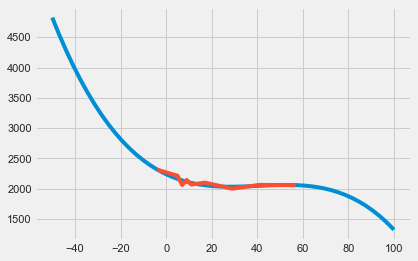

85.09288958761191 188.7555635200215


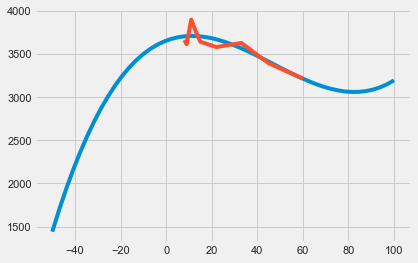

137.8406114761091 231.32783034421618


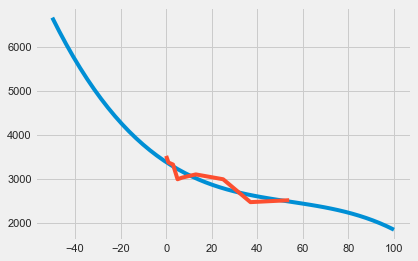

66.17132683614876 101.67284421644808


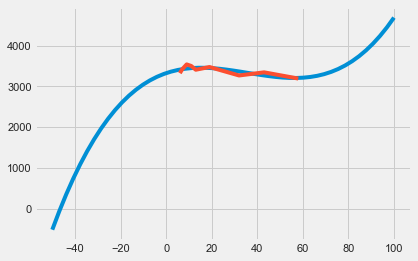

126.81738644063171 283.6229882492953


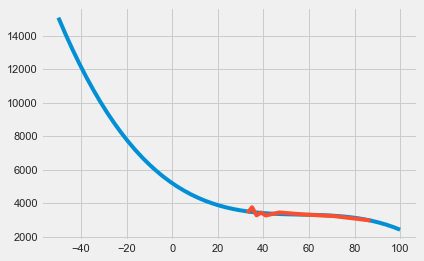

128.58991533664627 196.42633974484806


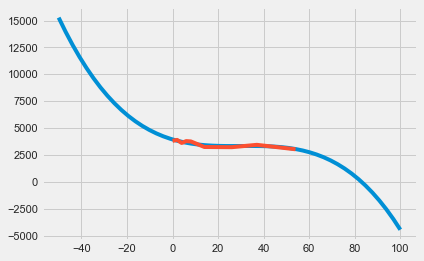

118.83060245835078 232.5599706330927


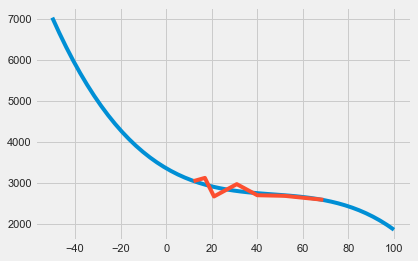

41.13903881893719 73.45074901215594


49.95270687635428 87.45861738929125


92.69879095261578 203.25791843884122


In [41]:
for i in range(10):
    x, y, poly = plot_n_deg_polynom_for_patient(i, 3)
    std = np.std(poly(x) - y)
    L_inf = np.max(np.abs(poly(x) - y))
    print(std, L_inf)
    plt.show()

Person never smoked has FVC lower than smoker. Some Ex-smoker have very high FVC.

## Predictions

In [42]:
train_df

Patient  Weeks   FVC    Percent  Age   Sex  \
0     ID00007637202177411956430     -4  2315  58.253649   79  Male   
1     ID00007637202177411956430      5  2214  55.712129   79  Male   
2     ID00007637202177411956430      7  2061  51.862104   79  Male   
3     ID00007637202177411956430      9  2144  53.950679   79  Male   
4     ID00007637202177411956430     11  2069  52.063412   79  Male   
...                         ...    ...   ...        ...  ...   ...   
1544  ID00426637202313170790466     13  2712  66.594637   73  Male   
1545  ID00426637202313170790466     19  2978  73.126412   73  Male   
1546  ID00426637202313170790466     31  2908  71.407524   73  Male   
1547  ID00426637202313170790466     43  2975  73.052745   73  Male   
1548  ID00426637202313170790466     59  2774  68.117081   73  Male   

     SmokingStatus  
0        Ex-smoker  
1        Ex-smoker  
2        Ex-smoker  
3        Ex-smoker  
4        Ex-smoker  
...            ...  
1544  Never smoked  
1545  Never smoked  
1546  Never smoked  
1547  Never smoked  
1548  Never smoked  

[1549 rows x 7 columns]

## Percent

A computed field which approximates the patient's FVC as a percent of the typical FVC for a person of similar characteristics

In [36]:
train_df['Percent'].value_counts()

83.282505     2
86.559510     2
121.595445    2
80.474296     2
61.885639     2
             ..
82.589902     1
65.508606     1
52.391737     1
54.591498     1
52.749977     1
Name: Percent, Length: 1536, dtype: int64

In [37]:
train_df['Percent'].iplot(kind='hist',bins=30,color='blue',xTitle='Percent distribution',yTitle='Count')

### Percent vs SmokingStatus In Patient Dataframe

In [38]:
df = train_df
fig = px.violin(df, y='Percent', x='SmokingStatus', box=True, color='Sex', points="all",
          hover_data=train_df.columns)
fig.show()

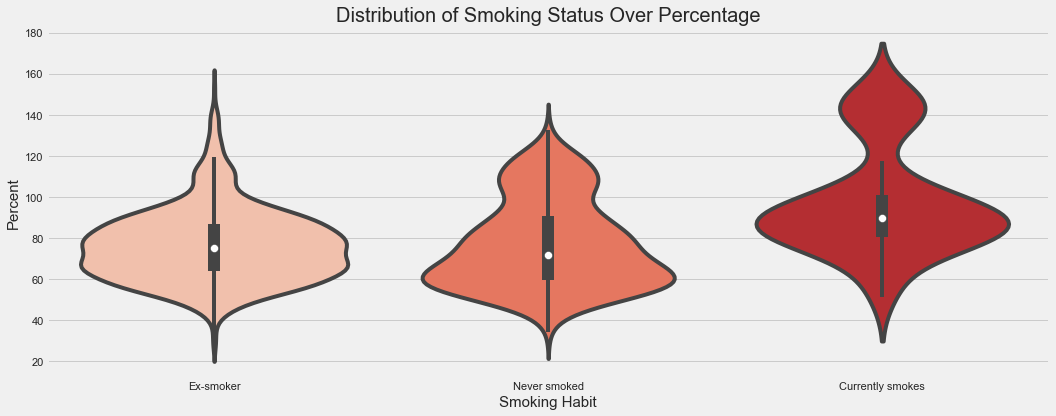

In [39]:
plt.figure(figsize=(16, 6))
ax = sns.violinplot(x = train_df['SmokingStatus'], y = train_df['Percent'], palette = 'Reds')
ax.set_xlabel(xlabel = 'Smoking Habit', fontsize = 15)
ax.set_ylabel(ylabel = 'Percent', fontsize = 15)
ax.set_title(label = 'Distribution of Smoking Status Over Percentage', fontsize = 20)
plt.show()

In [40]:
fig = px.scatter(train_df, x="Age", y="Percent", color='SmokingStatus')
fig.show()

### Pick one patient for FVC vs Weeks

In [41]:
patient = train_df[train_df.Patient == 'ID00228637202259965313869']
fig = px.line(patient, x="Weeks", y="Percent", color='SmokingStatus')
fig.show()

In [46]:
patient = train_df[train_df.Patient == tmp_patients[0]]
fig = px.line(patient, x="Weeks", y="Percent", color='SmokingStatus')
fig.show()

## Age Distribution of Unique Patients

In [ ]:
patient_df['Age'].iplot(kind='hist',bins=30,color='red',xTitle='Ages of distribution',yTitle='Count')

### Distribution of Age vs SmokingStatus In Patient Dataframe

In [ ]:
patient_df['SmokingStatus'].value_counts()

In [ ]:
plt.figure(figsize=(16, 6))
sns.kdeplot(patient_df.loc[patient_df['SmokingStatus'] == 'Ex-smoker', 'Age'], label = 'Ex-smoker',shade=True)
sns.kdeplot(patient_df.loc[patient_df['SmokingStatus'] == 'Never smoked', 'Age'], label = 'Never smoked',shade=True)
sns.kdeplot(patient_df.loc[patient_df['SmokingStatus'] == 'Currently smokes', 'Age'], label = 'Currently smokes', shade=True)

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.violinplot(x = patient_df['SmokingStatus'], y = patient_df['Age'], palette = 'Reds')
ax.set_xlabel(xlabel = 'Smoking habit', fontsize = 15)
ax.set_ylabel(ylabel = 'Age', fontsize = 15)
ax.set_title(label = 'Distribution of Smokers over Age', fontsize = 20)
plt.show()

### Distribution of Age vs Gender In Patient Dataframe

In [ ]:
plt.figure(figsize=(16, 6))
sns.kdeplot(patient_df.loc[patient_df['Sex'] == 'Male', 'Age'], label = 'Male',shade=True)
sns.kdeplot(patient_df.loc[patient_df['Sex'] == 'Female', 'Age'], label = 'Female',shade=True)
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

## Gender Distribution

In [ ]:
patient_df['Sex'].value_counts()

In [ ]:
patient_df['Sex'].value_counts().iplot(kind='bar',
                                          yTitle='Count', 
                                          linecolor='black', 
                                          opacity=0.7,
                                          color='blue',
                                          theme='pearl',
                                          bargap=0.8,
                                          gridcolor='white',
                                          title='Distribution of the Sex column in Patient Dataframe')

`139` : Male

`37` : Female

### Gender vs SmokingStatus In Patient Dataframe

In [ ]:
plt.figure(figsize=(16, 6))
a = sns.countplot(data=patient_df, x='SmokingStatus', hue='Sex')

for p in a.patches:
    a.annotate(format(p.get_height(), ','), 
           (p.get_x() + p.get_width() / 2., 
            p.get_height()), ha = 'center', va = 'center', 
           xytext = (0, 4), textcoords = 'offset points')

plt.title('Gender split by SmokingStatus', fontsize=16)
sns.despine(left=True, bottom=True);

In [ ]:
fig = px.box(patient_df, x="Sex", y="Age", points="all")
fig.show()

## Patient Overlap

In [ ]:
# Extract patient id's for the training set
ids_train = train_df.Patient.values
# Extract patient id's for the validation set
ids_test = test_df.Patient.values
#print(Fore.YELLOW +"Total Patients in Train set: ",Style.RESET_ALL,train_df['Patient'].count())
# Create a "set" datastructure of the training set id's to identify unique id's
ids_train_set = set(ids_train)
print(Fore.YELLOW + "There are",Style.RESET_ALL,f'{len(ids_train_set)}', Fore.BLUE + 'unique Patient IDs',Style.RESET_ALL,'in the training set')
# Create a "set" datastructure of the validation set id's to identify unique id's
ids_test_set = set(ids_test)
print(Fore.YELLOW + "There are", Style.RESET_ALL, f'{len(ids_test_set)}', Fore.BLUE + 'unique Patient IDs',Style.RESET_ALL,'in the test set')

# Identify patient overlap by looking at the intersection between the sets
patient_overlap = list(ids_train_set.intersection(ids_test_set))
n_overlap = len(patient_overlap)
print(Fore.YELLOW + "There are", Style.RESET_ALL, f'{n_overlap}', Fore.BLUE + 'Patient IDs',Style.RESET_ALL, 'in both the training and test sets')
print('')
print(Fore.CYAN + 'These patients are in both the training and test datasets:', Style.RESET_ALL)
print(f'{patient_overlap}')

`5` patients are in both the training and test datasets.

## Heatmap for train.csv

In [ ]:
corrmat = train_df.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap = 'RdYlBu_r', linewidths = 0.5) 

Please compare with the previous visualization information. And we may compare to Pandas Profiling below.

# 6. <a id='visual'>Visualising Images : DECOM 🗺️</a>  

`1` type of images containing the information:

- `.dcm` files: [DICOM files](https://en.wikipedia.org/wiki/DICOM). It's saved in the "Digital Imaging and Communications in Medicine" format. It contains an image from a medical scan, such as an ultrasound or MRI + information about the patient.

In [ ]:
print(Fore.YELLOW + 'Train .dcm number of images:',Style.RESET_ALL, len(list(os.listdir('../input/osic-pulmonary-fibrosis-progression/train'))), '\n' +
      Fore.BLUE + 'Test .dcm number of images:',Style.RESET_ALL, len(list(os.listdir('../input/osic-pulmonary-fibrosis-progression/test'))), '\n' +
      '--------------------------------', '\n' +
      'There is the same number of images as in train/ test .csv datasets')

Let's look at the DICOM images.

In [ ]:
def plot_pixel_array(dataset, figsize=(5,5)):
    plt.figure(figsize=figsize)
    plt.grid(False)
    plt.imshow(dataset.pixel_array, cmap='gray') # cmap=plt.cm.bone)
    plt.show()

In [ ]:
# https://www.kaggle.com/schlerp/getting-to-know-dicom-and-the-data
def show_dcm_info(dataset):
    print(Fore.YELLOW + "Filename.........:",Style.RESET_ALL,file_path)
    print()

    pat_name = dataset.PatientName
    display_name = pat_name.family_name + ", " + pat_name.given_name
    print(Fore.BLUE + "Patient's name......:",Style.RESET_ALL, display_name)
    print(Fore.BLUE + "Patient id..........:",Style.RESET_ALL, dataset.PatientID)
    print(Fore.BLUE + "Patient's Sex.......:",Style.RESET_ALL, dataset.PatientSex)
    print(Fore.YELLOW + "Modality............:",Style.RESET_ALL, dataset.Modality)
    print(Fore.GREEN + "Body Part Examined..:",Style.RESET_ALL, dataset.BodyPartExamined)
    
    if 'PixelData' in dataset:
        rows = int(dataset.Rows)
        cols = int(dataset.Columns)
        print(Fore.BLUE + "Image size.......:",Style.RESET_ALL," {rows:d} x {cols:d}, {size:d} bytes".format(
            rows=rows, cols=cols, size=len(dataset.PixelData)))
        if 'PixelSpacing' in dataset:
            print(Fore.YELLOW + "Pixel spacing....:",Style.RESET_ALL,dataset.PixelSpacing)
            dataset.PixelSpacing = [1, 1]
        plt.figure(figsize=(10, 10))
        plt.imshow(dataset.pixel_array, cmap='gray')
        plt.show()
for file_path in glob.glob('../input/osic-pulmonary-fibrosis-progression/train/*/*.dcm'):
    dataset = pydicom.dcmread(file_path)
    show_dcm_info(dataset)
    break # Comment this out to see all

In [ ]:
# https://www.kaggle.com/yeayates21/osic-simple-image-eda

imdir = "/kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00123637202217151272140"
print("total images for patient ID00123637202217151272140: ", len(os.listdir(imdir)))

# view first (columns*rows) images in order
fig=plt.figure(figsize=(12, 12))
columns = 4
rows = 5
imglist = os.listdir(imdir)
for i in range(1, columns*rows +1):
    filename = imdir + "/" + str(i) + ".dcm"
    ds = pydicom.dcmread(filename)
    fig.add_subplot(rows, columns, i)
    plt.imshow(ds.pixel_array, cmap='gray')
plt.show()

In [ ]:
# https://www.kaggle.com/yeayates21/osic-simple-image-eda

imdir = "/kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00123637202217151272140"
print("total images for patient ID00123637202217151272140: ", len(os.listdir(imdir)))

# view first (columns*rows) images in order
fig=plt.figure(figsize=(12, 12))
columns = 4
rows = 5
imglist = os.listdir(imdir)
for i in range(1, columns*rows +1):
    filename = imdir + "/" + str(i) + ".dcm"
    ds = pydicom.dcmread(filename)
    fig.add_subplot(rows, columns, i)
    plt.imshow(ds.pixel_array, cmap='jet')
plt.show()

# Visualization using gif
* https://www.kaggle.com/danpresil1/dicom-basic-preprocessing-and-visualization

In [ ]:
apply_resample = False

def load_scan(path):
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
        
    for s in slices:
        s.SliceThickness = slice_thickness
        
    return slices

In [ ]:
def load_scan(path):
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
        
    for s in slices:
        s.SliceThickness = slice_thickness
        
    return slices

In [ ]:
def get_pixels_hu(slices):
    image = np.stack([s.pixel_array for s in slices])
    # Convert to int16 (from sometimes int16), 
    # should be possible as values should always be low enough (<32k)
    image = image.astype(np.int16)

    # Set outside-of-scan pixels to 0
    # The intercept is usually -1024, so air is approximately 0
    image[image == -2000] = 0
    
    # Convert to Hounsfield units (HU)
    for slice_number in range(len(slices)):
        
        intercept = slices[slice_number].RescaleIntercept
        slope = slices[slice_number].RescaleSlope
        
        if slope != 1:
            image[slice_number] = slope * image[slice_number].astype(np.float64)
            image[slice_number] = image[slice_number].astype(np.int16)
            
        image[slice_number] += np.int16(intercept)
    
    return np.array(image, dtype=np.int16)

In [ ]:
def set_lungwin(img, hu=[-1200., 600.]):
    lungwin = np.array(hu)
    newimg = (img-lungwin[0]) / (lungwin[1]-lungwin[0])
    newimg[newimg < 0] = 0
    newimg[newimg > 1] = 1
    newimg = (newimg * 255).astype('uint8')
    return newimg

In [ ]:
scans = load_scan('../input/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/')
scan_array = set_lungwin(get_pixels_hu(scans))

In [ ]:
# Resample to 1mm (An optional step, it may not be relevant to this competition because of the large slice thickness on the z axis)

from scipy.ndimage.interpolation import zoom

def resample(imgs, spacing, new_spacing):
    new_shape = np.round(imgs.shape * spacing / new_spacing)
    true_spacing = spacing * imgs.shape / new_shape
    resize_factor = new_shape / imgs.shape
    imgs = zoom(imgs, resize_factor, mode='nearest')
    return imgs, true_spacing, new_shape

spacing_z = (scans[-1].ImagePositionPatient[2] - scans[0].ImagePositionPatient[2]) / len(scans)

if apply_resample:
    scan_array_resample = resample(scan_array, np.array(np.array([spacing_z, *scans[0].PixelSpacing])), np.array([1.,1.,1.]))[0]

In [ ]:
import imageio
from IPython.display import Image

imageio.mimsave("/tmp/gif.gif", scan_array, duration=0.0001)
Image(filename="/tmp/gif.gif", format='png')

# Visualization using Animation
* https://www.kaggle.com/pranavkasela/animating-the-lung-ct-scan

For animation, I used scan_array in 'visualization using gif' section.

In [ ]:
import matplotlib.animation as animation

fig = plt.figure()

ims = []
for image in scan_array:
    im = plt.imshow(image, animated=True, cmap="Greys")
    plt.axis("off")
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=100, blit=False,
                                repeat_delay=1000)


In [ ]:
HTML(ani.to_jshtml())

In [ ]:
HTML(ani.to_html5_video())

# 7. <a id='extract'>Extracting DIOCOM files information in a dataframe 🌊</a>

* https://www.kaggle.com/trsekhar123/nb-to-extract-metadata-and-resize-images-train

In [ ]:
def extract_dicom_meta_data(filename: str) -> Dict:
    # Load image
    
    image_data = pydicom.read_file(filename)
    img=np.array(image_data.pixel_array).flatten()
    row = {
        'Patient': image_data.PatientID,
        'body_part_examined': image_data.BodyPartExamined,
        'image_position_patient': image_data.ImagePositionPatient,
        'image_orientation_patient': image_data.ImageOrientationPatient,
        'photometric_interpretation': image_data.PhotometricInterpretation,
        'rows': image_data.Rows,
        'columns': image_data.Columns,
        'pixel_spacing': image_data.PixelSpacing,
        'window_center': image_data.WindowCenter,
        'window_width': image_data.WindowWidth,
        'modality': image_data.Modality,
        'StudyInstanceUID': image_data.StudyInstanceUID,
        'SeriesInstanceUID': image_data.StudyInstanceUID,
        'StudyID': image_data.StudyInstanceUID, 
        'SamplesPerPixel': image_data.SamplesPerPixel,
        'BitsAllocated': image_data.BitsAllocated,
        'BitsStored': image_data.BitsStored,
        'HighBit': image_data.HighBit,
        'PixelRepresentation': image_data.PixelRepresentation,
        'RescaleIntercept': image_data.RescaleIntercept,
        'RescaleSlope': image_data.RescaleSlope,
        'img_min': np.min(img),
        'img_max': np.max(img),
        'img_mean': np.mean(img),
        'img_std': np.std(img)}

    return row

In [ ]:
train_image_path = '/kaggle/input/osic-pulmonary-fibrosis-progression/train'
train_image_files = glob.glob(os.path.join(train_image_path, '*', '*.dcm'))

meta_data_df = []
for filename in tqdm.tqdm(train_image_files):
    try:
        meta_data_df.append(extract_dicom_meta_data(filename))
    except Exception as e:
        continue

The meta elements in dcom file seem to be slightly different for each file. So, I use Exception.
- Be careful!

In [ ]:
# Convert to a pd.DataFrame from dict
meta_data_df = pd.DataFrame.from_dict(meta_data_df)
meta_data_df.head()

The code below still makes sense, so I leave it.

In [ ]:
# source: https://www.kaggle.com/c/siim-isic-melanoma-classification/discussion/154658
folder='train'
PATH='../input/osic-pulmonary-fibrosis-progression/'

last_index = 2

column_names = ['image_name', 'dcm_ImageOrientationPatient', 
                'dcm_ImagePositionPatient', 'dcm_PatientID',
                'dcm_PatientName', 'dcm_PatientSex'
                'dcm_rows', 'dcm_columns']

def extract_DICOM_attributes(folder):
    patients_folder = list(os.listdir(os.path.join(PATH, folder)))
    df = pd.DataFrame()
    
    i = 0
    
    for patient_id in patients_folder:
   
        img_path = os.path.join(PATH, folder, patient_id)
        
        print(img_path)
        
        images = list(os.listdir(img_path))
        
        #df = pd.DataFrame()

        for image in images:
            image_name = image.split(".")[0]

            dicom_file_path = os.path.join(img_path,image)
            dicom_file_dataset = pydicom.read_file(dicom_file_path)
                
            '''
            print(dicom_file_dataset.dir("pat"))
            print(dicom_file_dataset.data_element("ImageOrientationPatient"))
            print(dicom_file_dataset.data_element("ImagePositionPatient"))
            print(dicom_file_dataset.data_element("PatientID"))
            print(dicom_file_dataset.data_element("PatientName"))
            print(dicom_file_dataset.data_element("PatientSex"))
            '''
            
            imageOrientationPatient = dicom_file_dataset.ImageOrientationPatient
            #imagePositionPatient = dicom_file_dataset.ImagePositionPatient
            patientID = dicom_file_dataset.PatientID
            patientName = dicom_file_dataset.PatientName
            patientSex = dicom_file_dataset.PatientSex
        
            rows = dicom_file_dataset.Rows
            cols = dicom_file_dataset.Columns
            
            #print(rows)
            #print(columns)
            
            temp_dict = {'image_name': image_name, 
                                    'dcm_ImageOrientationPatient': imageOrientationPatient,
                                    #'dcm_ImagePositionPatient':imagePositionPatient,
                                    'dcm_PatientID': patientID, 
                                    'dcm_PatientName': patientName,
                                    'dcm_PatientSex': patientSex,
                                    'dcm_rows': rows,
                                    'dcm_columns': cols}


            df = df.append([temp_dict])
            
        i += 1
        
        if i == last_index:
            break
            
    return df


In [ ]:
extract_DICOM_attributes('train')

# <a id='etc'>Etc. - Pandas Profiling 🌤️</a>

The meta elements in dcom file seem to be slightly different for each file.
- Be careful!

In [ ]:
import pandas_profiling as pdp

In [ ]:
train_df = pd.read_csv('../input/osic-pulmonary-fibrosis-progression/train.csv')
test_df = pd.read_csv('../input/osic-pulmonary-fibrosis-progression/test.csv')

In [ ]:
profile_train_df = pdp.ProfileReport(train_df)

In [ ]:
profile_train_df

In [ ]:
profile_test_df = pdp.ProfileReport(test_df)

In [ ]:
profile_test_df

## If this kernel is useful, <font color='orange'>please upvote</font>!
- See you next time!

# References
- https://www.kaggle.com/tarunpaparaju/siim-isic-melanoma-eda-pytorch-baseline
- https://www.kaggle.com/andradaolteanu/siim-melanoma-competition-eda-augmentations
- https://www.kaggle.com/parulpandey/melanoma-classification-eda-starter
- https://www.kaggle.com/yeayates21/osic-simple-image-eda
- https://www.kaggle.com/aviralpamecha/osic-in-depth-and-advanced-analysis
- https://www.kaggle.com/danpresil1/dicom-basic-preprocessing-and-visualization